In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [83]:
data = pd.read_csv('/content/drive/MyDrive/shot_logs.csv')

Loading and observing data.

In [84]:
data_5 = data.head(5)
data_5

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [85]:
third_ex = data.iloc[2]
third_ex.apply(type)

GAME_ID                         <class 'numpy.int64'>
MATCHUP                                 <class 'str'>
LOCATION                                <class 'str'>
W                                       <class 'str'>
FINAL_MARGIN                    <class 'numpy.int64'>
SHOT_NUMBER                     <class 'numpy.int64'>
PERIOD                          <class 'numpy.int64'>
GAME_CLOCK                              <class 'str'>
SHOT_CLOCK                    <class 'numpy.float64'>
DRIBBLES                        <class 'numpy.int64'>
TOUCH_TIME                    <class 'numpy.float64'>
SHOT_DIST                     <class 'numpy.float64'>
PTS_TYPE                        <class 'numpy.int64'>
SHOT_RESULT                             <class 'str'>
CLOSEST_DEFENDER                        <class 'str'>
CLOSEST_DEFENDER_PLAYER_ID      <class 'numpy.int64'>
CLOSE_DEF_DIST                <class 'numpy.float64'>
FGM                             <class 'numpy.int64'>
PTS                         

In [86]:
data.describe()
print("mean : \n ", data.describe().loc['mean'], "\n \n standard deviation : \n", \
      data.describe().loc['std'], "\n \n median : \n", data.describe().loc['50%']  )

mean : 
  GAME_ID                       2.140045e+07
FINAL_MARGIN                  2.087234e-01
SHOT_NUMBER                   6.506899e+00
PERIOD                        2.469427e+00
SHOT_CLOCK                    1.245334e+01
DRIBBLES                      2.023355e+00
TOUCH_TIME                    2.765901e+00
SHOT_DIST                     1.357150e+01
PTS_TYPE                      2.264670e+00
CLOSEST_DEFENDER_PLAYER_ID    1.590385e+05
CLOSE_DEF_DIST                4.123015e+00
FGM                           4.521391e-01
PTS                           9.973139e-01
player_id                     1.572383e+05
Name: mean, dtype: float64 
 
 standard deviation : 
 GAME_ID                         257.877259
FINAL_MARGIN                     13.233267
SHOT_NUMBER                       4.713260
PERIOD                            1.139919
SHOT_CLOCK                        5.763265
DRIBBLES                          3.477760
TOUCH_TIME                        3.043682
SHOT_DIST                        

In [87]:
data.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

In [88]:
data.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In here we can see that "SHOT_CLOCK" has some null values. I assume it is not recorded when player shoot the ball at 0.0, so I replace null values with 0.

In [89]:
data.loc[data.SHOT_CLOCK.isna(), 'SHOT_CLOCK'] = 0.0
data.isna().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
SHOT_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

Features “FGM” (field goals made) and “PTS” (points made) were perfect predictors of whether a shot attempt succeeded and therefore removed them.

In [90]:
data = data.drop(['FGM', 'PTS'], axis=1)
data_5 = data.head(5)
data_5

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0.0,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,brian roberts,203148


Converted “GAME CLOCK” from a time string into seconds.

In [91]:
data['GAME_CLOCK'] = pd.to_datetime(data['GAME_CLOCK'], format='%M:%S')
data['GAME_CLOCK'] = data['GAME_CLOCK'].dt.minute * 60 + data['GAME_CLOCK'].dt.second
data['GAME_CLOCK']

0          69
1          14
2           0
3         707
4         634
         ... 
128064    112
128065    688
128066    670
128067    157
128068     12
Name: GAME_CLOCK, Length: 128069, dtype: int64

Removed categorical variables that had more than two categories.

In [92]:
data = data.drop(['GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_name', 'player_id'], axis=1)
data_5 = data.head(5)
data_5

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,A,W,24,1,1,69,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,14,3.4,0,0.8,28.2,3,missed,6.1
2,A,W,24,3,1,0,0.0,3,2.7,10.1,2,missed,0.9
3,A,W,24,4,2,707,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,634,10.9,2,2.7,3.7,2,missed,1.1


Calculating also "TOTAL_GAME_TIME". Assuming that there is 12 mins in per period.

In [93]:
data['TOTAL_GAME_TIME'] = (data['PERIOD'] - 1) * 12 * 60 + (12 * 60 - data['GAME_CLOCK'])
data['TOTAL_GAME_TIME']

0          651
1          706
2          720
3          733
4          806
          ... 
128064    2048
128065    2192
128066    2210
128067    2723
128068    2868
Name: TOTAL_GAME_TIME, Length: 128069, dtype: int64

 Preparing the dataset for classification is transforming the non-numeric variables to numeric variables. location, w, pts_type, shot_result have 2 different values, lets transform them 1-0s.


In [94]:
le = LabelEncoder()
le.fit(data.loc[:,'LOCATION'])
data.loc[:,'LOCATION'] = le.transform(data.loc[:,'LOCATION'])

le.fit(data.loc[:,'W'])
data.loc[:,'W'] = le.transform(data.loc[:,'W'])

le.fit(data.loc[:,'PTS_TYPE'])
data.loc[:,'PTS_TYPE'] = le.transform(data.loc[:,'PTS_TYPE'])

le.fit(data.loc[:,'SHOT_RESULT'])
data.loc[:,'SHOT_RESULT'] = le.transform(data.loc[:,'SHOT_RESULT'])

data_5 = data.head(5)
data_5

<ipython-input-94-2770bc728143>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'LOCATION'] = le.transform(data.loc[:,'LOCATION'])
<ipython-input-94-2770bc728143>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'W'] = le.transform(data.loc[:,'W'])
<ipython-input-94-2770bc728143>:12: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-u

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,0,1,24,1,1,69,10.8,2,1.9,7.7,0,0,1.3,651
1,0,1,24,2,1,14,3.4,0,0.8,28.2,1,1,6.1,706
2,0,1,24,3,1,0,0.0,3,2.7,10.1,0,1,0.9,720
3,0,1,24,4,2,707,10.3,2,1.9,17.2,0,1,3.4,733
4,0,1,24,5,2,634,10.9,2,2.7,3.7,0,1,1.1,806


 Location : A -> 0, H -> 1

 W : L -> 0, W -> 1

 Pts Type : 2 -> 0, 3 -> 1

 Shot Result : made -> 0, missed -> 1

 Lets change shot results to: made -> 1 missed -> 0

In [95]:
data['SHOT_RESULT'] = 1 - data['SHOT_RESULT']

data_5 = data.head(5)
data_5

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,0,1,24,1,1,69,10.8,2,1.9,7.7,0,1,1.3,651
1,0,1,24,2,1,14,3.4,0,0.8,28.2,1,0,6.1,706
2,0,1,24,3,1,0,0.0,3,2.7,10.1,0,0,0.9,720
3,0,1,24,4,2,707,10.3,2,1.9,17.2,0,0,3.4,733
4,0,1,24,5,2,634,10.9,2,2.7,3.7,0,0,1.1,806


Some visualisations to look connection between shot result and other elements.

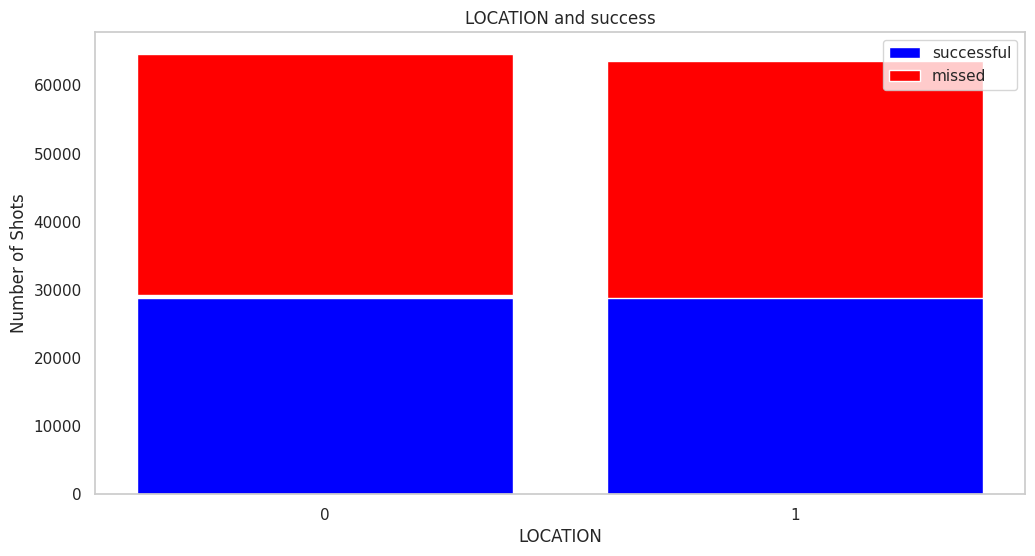

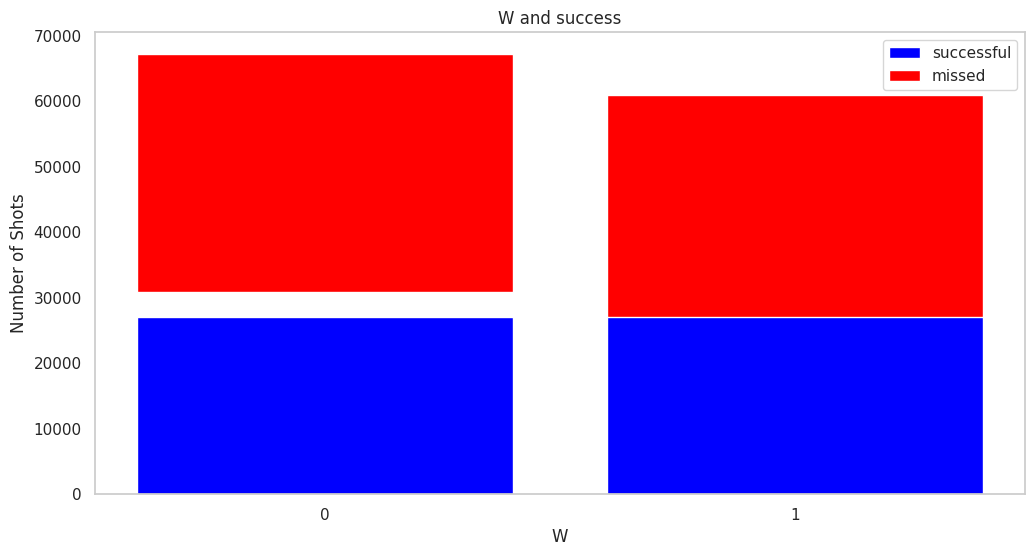

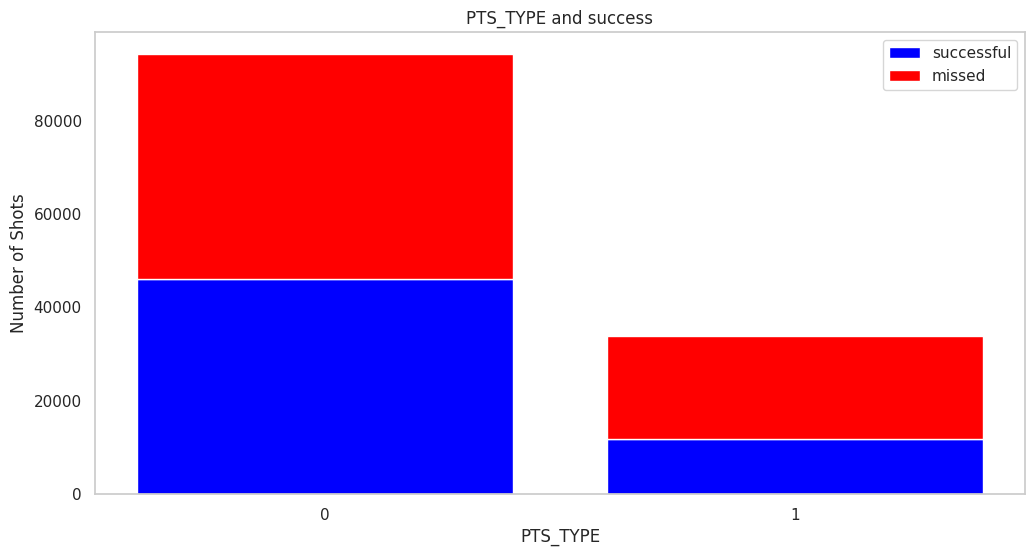

In [106]:
columns_to_plot = ['LOCATION', 'W', 'PTS_TYPE']
for column in columns_to_plot:
    plt.figure(figsize=(12, 6))

    data_shot_1 = data[data['SHOT_RESULT'] == 1]
    data_shot_0 = data[data['SHOT_RESULT'] == 0]

    count_per_value_1 = data_shot_1[column].value_counts()
    count_per_value_0 = data_shot_0[column].value_counts()

    plt.bar(count_per_value_1.index, count_per_value_1, color='blue', label='successful')
    plt.bar(count_per_value_0.index, count_per_value_0, color='red', label='missed', bottom=count_per_value_1)

    plt.xticks(count_per_value_1.index)

    plt.legend(loc='best')
    plt.grid()
    plt.xlabel(column)
    plt.ylabel('Number of Shots')
    plt.title(f'{column} and success')

    plt.show()

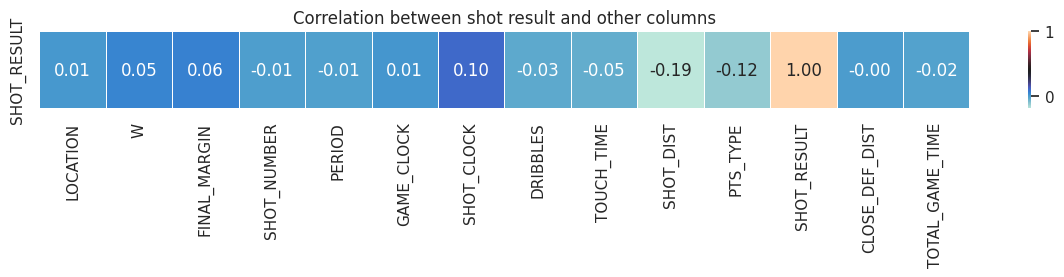

In [117]:
row_for_correlation = 'SHOT_RESULT'

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 1))
sns.heatmap(data.corr()[['SHOT_RESULT']].T, annot=True, fmt=".2f", cmap="icefire", linewidths=.5, ax=axes)
axes.set_title('Correlation between shot result and other columns')

plt.show()